In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [207]:
df_index=pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [208]:
df_index.drop(columns=['Unnamed: 0','year','month'] ,axis=1,inplace=True)


In [209]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [210]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

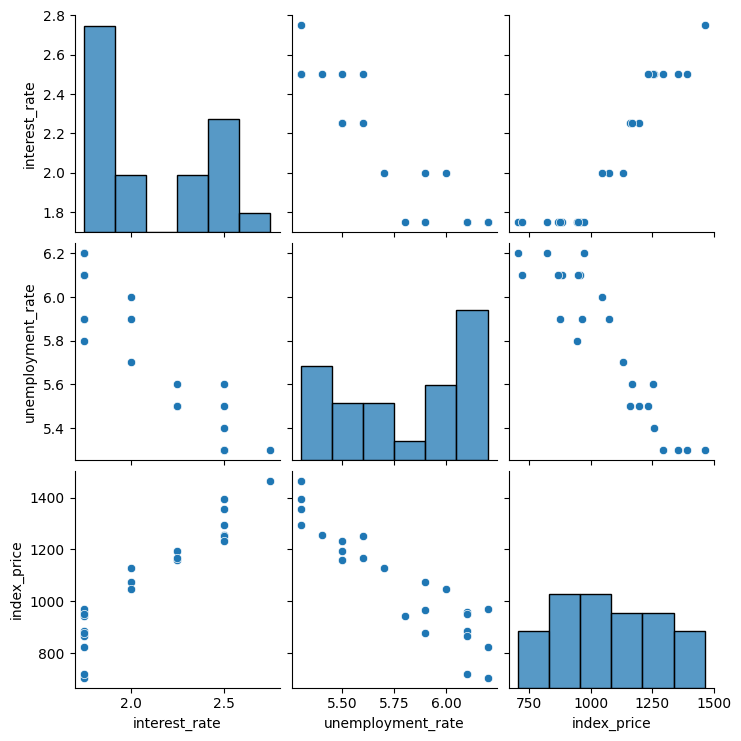

In [211]:
import seaborn as sns
sns.pairplot(df_index)

In [212]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [213]:
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [214]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [215]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)


<Axes: xlabel='interest_rate', ylabel='index_price'>

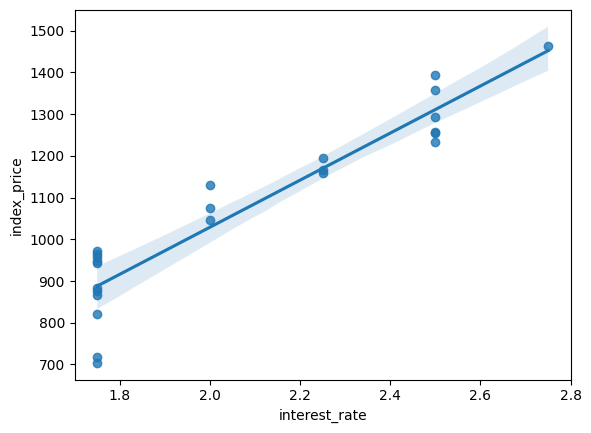

In [216]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
scalar=StandardScaler()

X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [219]:
X_train

array([[ 0.48507125, -0.75327865],
       [-0.24253563,  0.68916982],
       [-0.24253563,  0.40068013],
       [ 1.21267813, -1.33025803],
       [ 0.48507125, -0.46478895],
       [-0.9701425 ,  0.97765952],
       [ 1.21267813, -1.33025803],
       [-0.9701425 ,  1.26614921],
       [ 0.48507125, -0.75327865],
       [-0.9701425 ,  0.40068013],
       [-0.9701425 ,  0.11219044],
       [ 1.21267813, -1.33025803],
       [-0.9701425 ,  1.26614921],
       [-0.9701425 ,  0.97765952],
       [-0.9701425 ,  1.26614921],
       [-0.9701425 ,  0.97765952],
       [ 1.940285  , -1.33025803],
       [ 1.21267813, -1.04176834]])

In [220]:
from sklearn.linear_model import LinearRegression


In [221]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [222]:
print("Coefficient is :: ",regression.coef_)
print("Intercept  is :: ",regression.intercept_)

Coefficient is ::  [156.27672775 -49.75730695]
Intercept  is ::  1079.0


In [223]:
from sklearn.model_selection import cross_val_score

In [224]:
validation_score=cross_val_score(regression,X_train,y_train, cv=5, scoring='neg_mean_squared_error')
np.mean(validation_score)

np.float64(-4641.569443834533)

In [225]:
## predict 
y_pred=regression.predict(X_test)

In [226]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8022.02970173398
81.05207649555818
89.5657842132473


In [227]:
## R squared 

from sklearn.metrics import r2_score

score =r2_score(y_test,y_pred)
print(score)
## Adjusted R squared

print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7673147825836226
0.6121913043060376


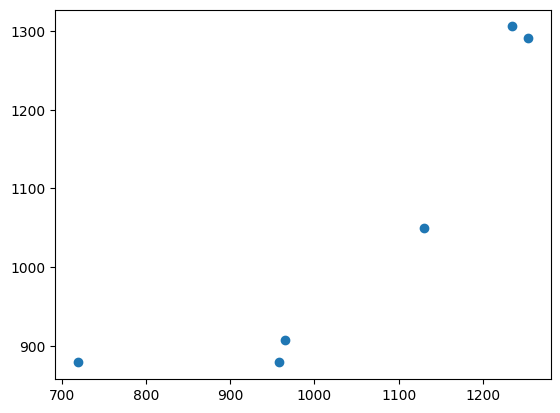

In [228]:
plt.scatter(y_test,y_pred)

In [229]:
residuals=y_test-y_pred
print(residuals)

6     -71.994486
10     80.130498
5     -37.640016
13     57.547460
23   -159.743600
15     79.256400
Name: index_price, dtype: float64


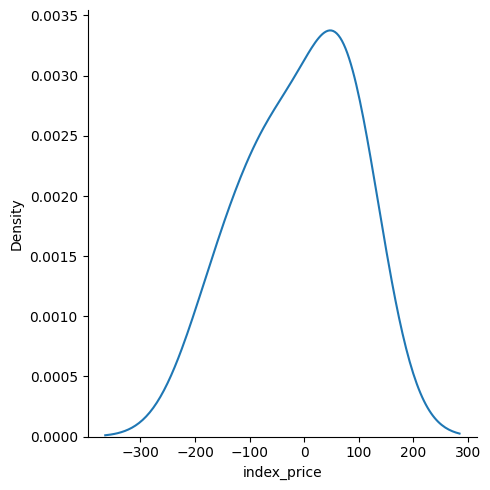

In [230]:
sns.displot(residuals,kind='kde')

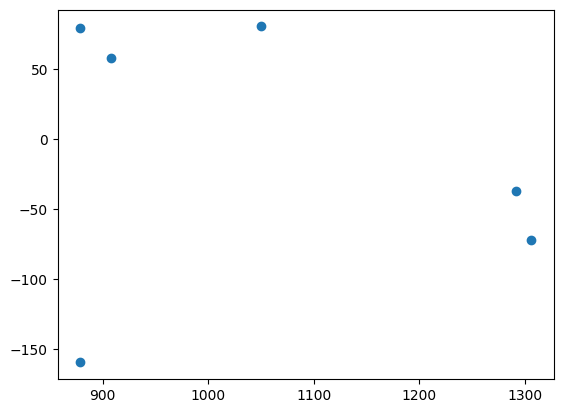

In [231]:
plt.scatter(y_pred,residuals)

In [232]:
## OLS method in linear regression

import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2845
Date:                Sat, 15 Feb 2025   Prob (F-statistic):                       0.756
Time:                        11:06:02   Log-Likelihood:                         -151.28
No. Observations:                  18   AIC:                                      306.6
Df Residuals:                      16   BIC:                                      308.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Rupesh\Documents\PYTHON\myvenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [233]:
regression.predict(scalar.transform([[2.75,5.3]]))

c:\Users\Rupesh\Documents\PYTHON\myvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1448.41144808])

In [234]:

# Ensure the feature names match the ones used during training
new_data = pd.DataFrame([[1.75, 6.1]], columns=["interest_rate", "unemployment_rate"])

# Transform using the same scaler
new_data_scaled = scalar.transform(new_data)

# Predict using the trained model
predicted_output = regression.predict(new_data_scaled)

print("Predicted Output:", predicted_output)


Predicted Output: [878.74359984]
